In [7]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

[[[ 8.95763596  2.01719202]
  [ 4.75370223  2.01719202]]

 [[ 5.63275572  0.01719202]
  [ 5.63275572  4.01719202]]

 [[ 9.07566474  2.49292229]
  [ 9.07566474  4.10382923]]

 [[ 7.07566474  7.55551139]
  [11.07566474  7.55551139]]

 [[ 2.28798165  0.7697991 ]
  [ 2.89751453  1.61221287]]

 [[ 9.29697652  8.0812038 ]
  [ 6.33403757  8.7146059 ]]

 [[ 8.03672077  1.86570059]
  [ 8.92558998  5.39342242]]

 [[ 8.07440155  8.960913  ]
  [ 3.18003475  1.10051925]]

 [[ 2.27935163  4.27107789]
  [ 8.18014766  8.60730583]]

 [[ 0.06952131  5.10747303]
  [ 4.17411003  2.2210781 ]]

 [[ 2.          0.        ]
  [ 3.          0.        ]]

 [[ 1.          0.        ]
  [ 4.          0.        ]]]
Всего отрезков: 12
Отрезки 0 и 1 пересекаются в точке (5.63, 2.02)
Отрезки 0 и 6 пересекаются в точке (8.07, 2.02)
Отрезки 3 и 7 пересекаются в точке (7.20, 7.56)
Отрезки 5 и 7 пересекаются в точке (7.73, 8.42)
Отрезки 5 и 8 пересекаются в точке (7.88, 8.38)
Отрезки 7 и 8 пересекаются в точке (7.58, 8.1

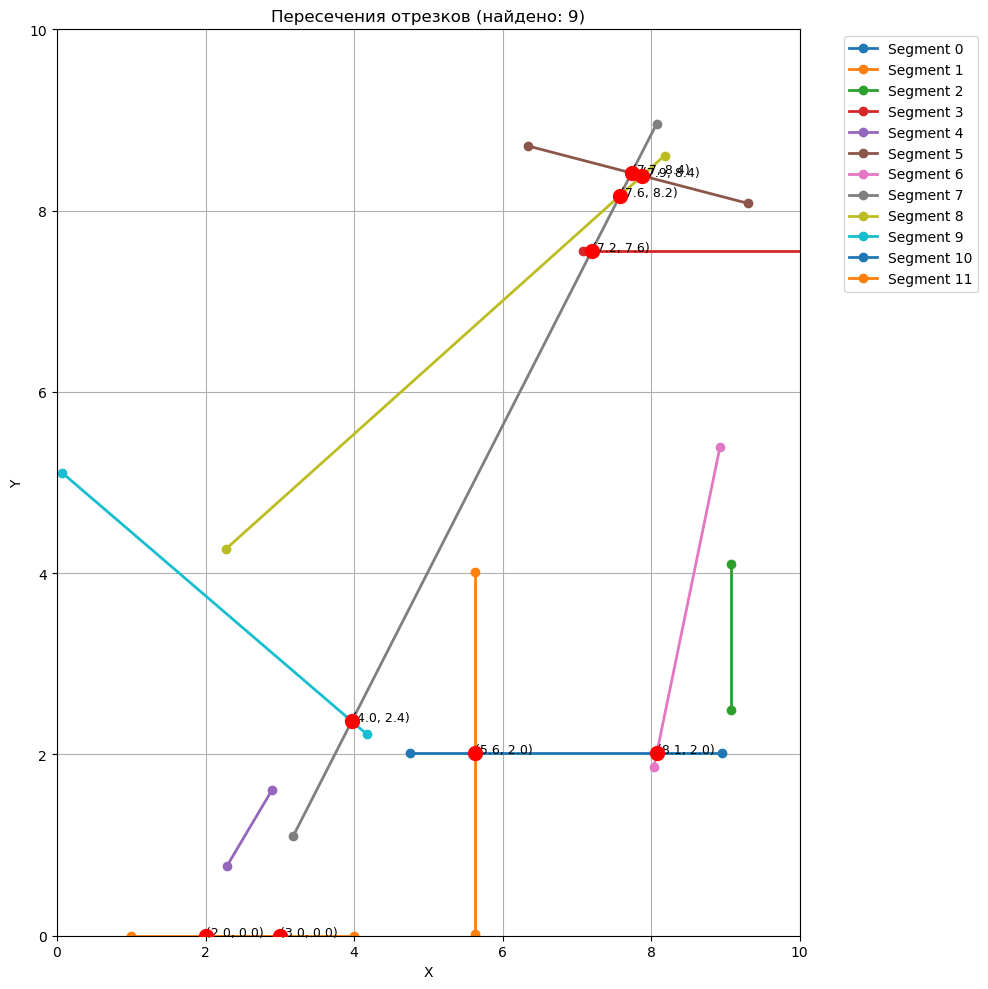

In [8]:



def generate_random_segments(n=10, min_intersections=2, coord_range=(0, 10)):
    # Создаем массив для хранения отрезков: (n, 2, 2), где каждый отрезок описывается двумя точками (x1,y1)-(x2,y2)
    segments = np.zeros((n, 2, 2))

    # Генерируем min_intersections пар пересекающихся отрезков
    for i in range(0, min_intersections * 2, 2):
        # Первый отрезок (горизонтальный или вертикальный)
        if np.random.choice([True, False]):
            # Горизонтальный отрезок
            y = np.random.uniform(*coord_range)
            x1, x2 = np.random.uniform(*coord_range, size=2)
            segments[i] = np.array([[x1, y], [x2, y]])
        else:
            # Вертикальный отрезок
            x = np.random.uniform(*coord_range)
            y1, y2 = np.random.uniform(*coord_range, size=2)
            segments[i] = np.array([[x, y1], [x, y2]])

        # Второй отрезок, гарантированно пересекающий первый
        if segments[i, 0, 0] == segments[i, 1, 0]:  # Первый вертикальный → второй горизонтальный
            x = segments[i, 0, 0]
            y = np.random.uniform(*coord_range)
            segments[i + 1] = np.array([[x - 2, y], [x + 2, y]])  # Пересекает первый
        else:  # Первый горизонтальный → второй вертикальный
            y = segments[i, 0, 1]
            x = np.random.uniform(*coord_range)
            segments[i + 1] = np.array([[x, y - 2], [x, y + 2]])  # Пересекает первый

    # Остальные отрезки — случайные
    for i in range(min_intersections * 2, n):
        segments[i] = np.random.uniform(*coord_range, size=(2, 2))

    return segments


def find_intersections(segments):
    n = len(segments)
    intersections = []

    for i, j in itertools.combinations(range(n), 2):
        seg1, seg2 = segments[i], segments[j]
        s1, e1 = seg1[0], seg1[1]
        s2, e2 = seg2[0], seg2[1]

        s1x, s1y = s1
        e1x, e1y = e1
        s2x, s2y = s2
        e2x, e2y = e2
        t_arr, u_arr = [], []
        v1 = e1 - s1
        v2 = e2 - s2
        v1x, v1y = v1[0], v1[1]
        v2x, v2y = v2[0], v2[1]

        # коллинеарны
        if abs(v1x * v2y - v1y * v2x) < 1e-9:
            if v1y != 0:
                t_arr.extend([(s2y - s1y) / v1y, (s2y - s1y + v2y) / v1y])
                u_arr.extend([0, 1])
            elif v1x != 0:
                t_arr.extend([(s2x - s1x) / v1x, (s2x - s1x + v2x) / v1x])
                u_arr.extend([0, 1])
            if v2y != 0:
                t_arr.extend([0, 1])
                u_arr.extend([(s1y - s2y) / v2y, (s1y - s2y + v1y) / v2y])
            elif v2x != 0:
                t_arr.extend([0, 1])
                u_arr.extend([(s1x - s2x) / v2x, (s1x - s2x + v1x) / v2x])
        elif v2y != 0:
            A = v2x / v2y
            B = s2x - s1x + A * (s1y - s2y)
            t = B / (v1x - A * v1y)
            t_arr.append(t)
            u_arr.append((s1y - s2y + v1y * t) / v2y)
        elif v1y != 0:
            A = v1x / v1y
            B = s1x - s2x + A * (s2y - s1y)
            u = B / (v2x - A * v2y)
            u_arr.append(u)
            t_arr.append((s2y - s1y + v2y * u) / v1y)
        for t, u in zip(t_arr, u_arr):
            if 0 <= t <= 1 and 0 <= u <= 1:
                point_t = s1 + t * v1
                point_u = s2 + u * v2
                if np.all(np.abs(point_t - point_u) < 1e-9):
                    intersections.append((i, j, point_t))
    return intersections


def plot_segments(segments, intersections):
    plt.figure(figsize=(10, 10))

    for i, seg in enumerate(segments):
        plt.plot(seg[:, 0], seg[:, 1], marker='o', label=f'Segment {i}', linewidth=2)

    for i, j, point in intersections:
        plt.scatter(point[0], point[1], color='red', s=100, zorder=5)
        plt.text(point[0], point[1], f'({point[0]:.1f}, {point[1]:.1f})', fontsize=9)

    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f"Пересечения отрезков (найдено: {len(intersections)})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.tight_layout()
    plt.show()


# np.random.seed(42)
segments = generate_random_segments(n=10, min_intersections=2)
segments = np.array(segments)
segments = np.append(segments, [[[2, 0], [3, 0]]], axis=0)
segments = np.append(segments, [[[1, 0], [4, 0]]], axis=0)
print(segments)
intersections = find_intersections(segments)

print(f"Всего отрезков: {len(segments)}")
for i, j, point in intersections:
    print(f"Отрезки {i} и {j} пересекаются в точке ({point[0]:.2f}, {point[1]:.2f})")

plot_segments(segments, intersections)